Marcelo Diniz

12/01/2021

Applied Data Science Capstone Project


# Choose location to focus a beverage distribution business in Madrid

## Introduction

This paper intends to choose the best focus area for a local beverage distribution center located in Madrid Spain, using data from internet machine learning techniques. The programing will be done using Python in a Jupyter Notebook.

As in every big city in Europe, it’s quite difficult to transport and deliver products with rigorous time schedule due to heavy traffic, restrictions mobility and rare parking spots. Taking in account the highly competitive Madrid beverage business, focusing on a specific high profitable area is one of the most useful strategies to reduce logistics cost and ensuring client fidelity.

To decide where to focus the business, Madrid will be divided into its neighborhoods. Then, three factors will be evaluated:

•	Amount of bars

•	Most common category of bars

•	Average square meter price (which intends to indicate the average income of people living in surrounding area)

## Data Sources

The first information needed to initiate this analysis is a list of Madrid’s neighborhoods name. This data will be gathered from a Wikipedia website (https://en.wikipedia.org/wiki/List_of_neighborhoods_of_Madrid).

Afterwards, Geopy API will be used to get the exact coordinates of each neighborhoods. Geopy API documentation can be found in https://geopy.readthedocs.io/en/stable/.

With the location in hands, it’s time to look for the venues in each neighborhood. Foursquare API will be suitable for this job. Official documentation in https://developer.foursquare.com/docs/. 

Finally, the average income of the area will be estimated by the square meter prices of places for rent in each neighborhood. This data will be mined from https://www.idealista.com/en/ which is one of the largest providers of real state online information in Spain. Idealista API will be used to get the data from idealista website. The API documentation can be found in https://github.com/esri-es/idealista-api.

## Madrid Neighborhoods from Wikipedia

In order to stablish a connection with the Wikipedia website, the 'request' module will be used. The requests module sends HTTP requests using Python. The HTTP request returns a Response Object with all the response data (content, encoding, status, etc).


The 'get' method will be used to get the website content. Therefore, the connection to the website will be tested with the 'status_code' method. A status_code '200' means the connections was successful.

In [1]:
import requests
response = requests.get(
url="https://en.wikipedia.org/wiki/List_of_neighborhoods_of_Madrid")

if response.status_code == 200:
    print('Status Code:',response.status_code,'Success!')
else:
    print('Status Code:',response.status_code,'Connection Error')

Status Code: 200 Success!


As the connection looks good, the website content will be transformed in a readable dataframe using the pandas library.

In [2]:
import pandas as pd
df = pd.read_html(response.content)[0]
df

,District name (number),District location,Number,Name,Image
0,Centro (1),NaN,11,Palacio,NaN
1,Centro (1),NaN,12,Embajadores,NaN
2,Centro (1),NaN,13,Cortes,NaN
3,Centro (1),NaN,14,Justicia,NaN
4,Centro (1),NaN,15,Universidad,NaN
...,...,...,...,...,...
126,Barajas (21),NaN,211,Alameda de Osuna,NaN
127,Barajas (21),NaN,212,Aeropuerto,NaN
128,Barajas (21),NaN,213,Casco Histórico de Barajas,NaN
129,Barajas (21),NaN,214,Timón,NaN


The 'df' shows the table from the Wikipedia website. As the original table has more data than the necessary for this study, some columns will be deleted
Also, it's not necessary to have the (number) besides the district name, so this value and the column name will be modified.

In [3]:
df['District name'] = df.loc[:,'District name (number)'].str.replace('\W\d+\W','')
df['District name'] = df['District name'].str.strip()
df['Neighborhood'] = df['Name'].str.strip()
df=df[["District name","Neighborhood"]]

df

,District name,Neighborhood
0,Centro,Palacio
1,Centro,Embajadores
2,Centro,Cortes
3,Centro,Justicia
4,Centro,Universidad
...,...,...
126,Barajas,Alameda de Osuna
127,Barajas,Aeropuerto
128,Barajas,Casco Histórico de Barajas
129,Barajas,Timón


Now the dataframe is cleaned and has the exact information of the districts and neighborhoods in Madrid. Let's have a look on the df characteristics.

In [4]:
print("df has {} lines, {} districs and  {} unique neighborhoods.".format(df.shape[0],df['District name'].nunique(),df['Neighborhood'].nunique()))

df has 131 lines, 21 districs and  131 unique neighborhoods.


## Neighborhood coordinates using Geopy API

Once the neighborhood names are listed and stored on the df dataframe, Geopy API will be used to get the coordinates of each neighborhood. Geopy uses the location address as input and returns the latitude and longitude.

In [5]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="tutorial")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=0.5)

df = df.assign(Adress= lambda x: (df['Neighborhood']+","+df['District name']+",Madrid"))

df['location'] = df['Adress'].apply(geocode)
df['coord'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
df[['Latitude','longitude','aux']] = pd.DataFrame(df['coord'].to_list())
df = df[['District name','Neighborhood','Adress','Latitude','longitude']]

In [6]:
df

,District name,Neighborhood,Adress,Latitude,longitude
0,Centro,Palacio,"Palacio,Centro,Madrid",40.415129,-3.715618
1,Centro,Embajadores,"Embajadores,Centro,Madrid",40.409681,-3.701644
2,Centro,Cortes,"Cortes,Centro,Madrid",40.414348,-3.698525
3,Centro,Justicia,"Justicia,Centro,Madrid",40.423957,-3.695747
4,Centro,Universidad,"Universidad,Centro,Madrid",40.425310,-3.706630
...,...,...,...,...,...
126,Barajas,Alameda de Osuna,"Alameda de Osuna,Barajas,Madrid",40.457581,-3.587975
127,Barajas,Aeropuerto,"Aeropuerto,Barajas,Madrid",40.494838,-3.574081
128,Barajas,Casco Histórico de Barajas,"Casco Histórico de Barajas,Barajas,Madrid",NaN,NaN
129,Barajas,Timón,"Timón,Barajas,Madrid",40.473171,-3.584152


The dataframe look's good with the new columns Address, Latitude and longitude. However, it's necessary to check if it was possible to get all coordinates from geopy. To do that, the 'isnan' function from numpy library will be used. This function returns any Not A Number value.

In [7]:
import numpy as np
df.loc[np.isnan(df.Latitude)]

,District name,Neighborhood,Adress,Latitude,longitude
58,Latina,Los Cármenes,"Los Cármenes,Latina,Madrid",NaN,NaN
116,Vicálvaro,Valderrivas,"Valderrivas,Vicálvaro,Madrid",NaN,NaN
128,Barajas,Casco Histórico de Barajas,"Casco Histórico de Barajas,Barajas,Madrid",NaN,NaN


As its stated on the table above, geopy couldn't find the coordinates of three neighborhoods. Those will be discarded from the df.

In [8]:
df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)

Now that the df has all coordinates, let's use the folium library to plot a map of Madrid with markers on each neighborhood to get an overview of the city.

In [9]:
import folium # map rendering library
# Latitude and longitude of the center of madrid to initialize the map
latitude = 40.416775
longitude =-3.703790
map_madrid = folium.Map(location=[latitude, longitude], zoom_start=12,tiles='Stamen Toner')
# add markers to map
locations = df[['Latitude', 'longitude']]
locationlist = locations.values.tolist()
    
for lat,long,nei in zip(df['Latitude'],df['longitude'],df['Neighborhood']):
    folium.Marker([lat,long], popup=nei).add_to(map_madrid)

map_madrid

## Neighborhood's venues using Fourquare API

In order to use the FourSquare API, it's necessary to register in the website and request a personal key. 

FourSquare accepts the request with coordinates and search radius as input, so the search will be done with the coordinates of each neighborhood in ‘df’ and a radius of 500m. Also, as FourSquare has thousands of venues categories, in this study we will filter the search by the 'Night life spots' category. A list of all categories can be found here: https://developer.foursquare.com/docs/build-with-foursquare/categories/


In [10]:
file = (r'C:\Users\marce\OneDrive\API Key\Foursquared API secret.csv') # import api key from personal computer
apikey = pd.read_csv(file)
CLIENT_ID = apikey['CLIENT_ID'][0]
CLIENT_SECRET = apikey['CLIENT_SECRET'][0]
VERSION = apikey['VERSION'][0]
LIMIT = apikey['LIMIT'][0]

A function called 'getNearbyVenues' will be used to make the request by each neighborhood location. The function receives as inputs the neighborhoods name, coordinates, radius, venue category and personal access key - than it returns a dataframe with all venues in area with their coordinates and category.

In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    category = "4d4b7105d754a06376d81259"
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, CLIENT_SECRET,VERSION,lat,lng,radius,LIMIT,category)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,lat,lng,v['venue']['name'],v['venue']['location']['lat'],v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood','Neighborhood Latitude','Neighborhood Longitude','Venue', 
                  'Venue Latitude','Venue Longitude','Venue Category']
    return(nearby_venues)

Now we call the function and asign the resulting dataframe as madrid_venues 

In [12]:
madrid_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['longitude'])
madrid_venues.tail()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1486,Timón,40.473171,-3.584152,La Consentida,40.472353,-3.582128,Gastropub
1487,Corralejos,40.468164,-3.587073,The Glass Bar,40.469899,-3.588425,Restaurant
1488,Corralejos,40.468164,-3.587073,Bar El Liberal,40.469583,-3.587533,Bar
1489,Corralejos,40.468164,-3.587073,Pub 301,40.469570,-3.587197,Pub
1490,Corralejos,40.468164,-3.587073,301 Bar de copas,40.469948,-3.588578,Bar


As we have all venues returned from Foursquare in the madrid_venues dataframe, it is time to know many venues were found in each neighborhood. A proportion graphic will be used to visualize this information

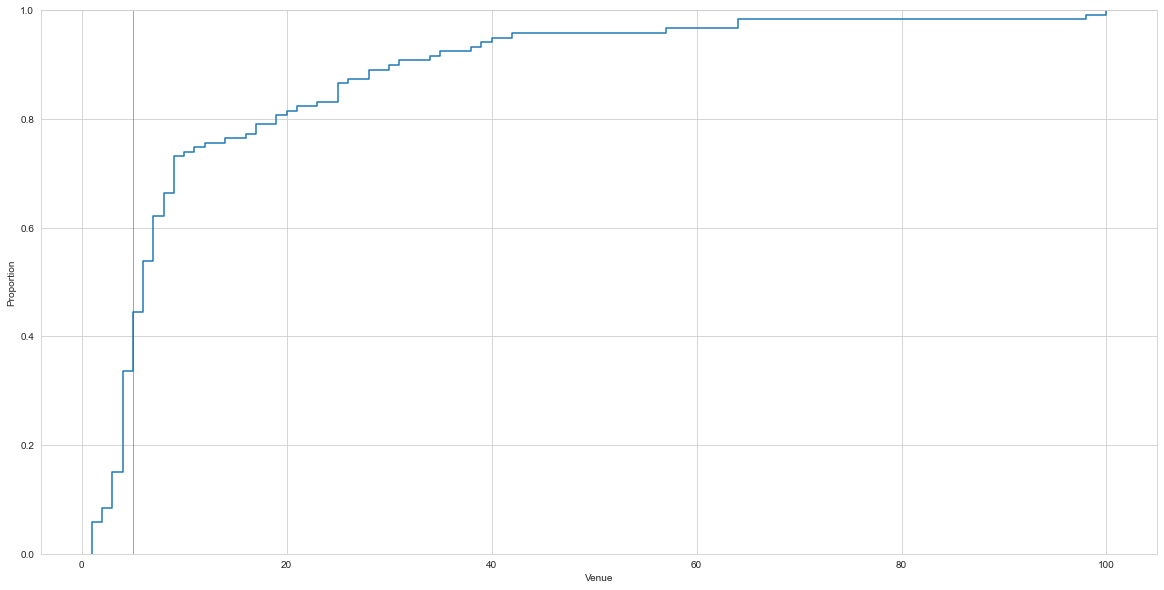

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
f = plt.figure(figsize=(20,10)) 
sns.set_style("whitegrid")
sns.ecdfplot(madrid_venues.groupby(by='Neighborhood').count().sort_values(by='Venue'), x="Venue")
plt.axvline(5, linewidth=0.5,color='r')

The graphic shows that around 33% of Madrid neighborhoods returned less than 5 bars. Neighborhood with less than 5 bars will be excluded from the analysis.

In [14]:
aux = madrid_venues.groupby(by='Neighborhood',as_index=False).count()
aux = aux[aux['Venue']>=5]['Neighborhood'].tolist()
#eep_neib = aux['Neighborhood'].tolist()
madrid_venues = madrid_venues[madrid_venues['Neighborhood'].isin(aux)]
df = df[df['Neighborhood'].isin(aux)]

### Analyze Each Neighborhood Venues

It's time to analyze the categories of each venue within each neighborhood. The venues are already filtered by night life spot, as this is the category that comprehends the main clients of the beverage distributor, but Foursquare offers subcategories, which can be Pub, Sports bar, Nightclub and many others. 

The following code will list the venues by their sub category and then evaluate the most common categories in each neighborhood. The result will be stored in a new dataframe named neighborhoods_venues_sorted which contains the 5 most common venues in each neighborhood.

In [15]:
# one hot encoding
madrid_onehot = pd.get_dummies(madrid_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
madrid_onehot['Neighborhood'] = madrid_venues['Neighborhood'] 
# move neighborhood column to the first column
fixed_columns = [madrid_onehot.columns[-1]] + list(madrid_onehot.columns[:-1])
madrid_onehot = madrid_onehot[fixed_columns]

In [16]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [17]:
madrid_grouped = madrid_onehot.groupby('Neighborhood').mean().reset_index()

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = madrid_grouped['Neighborhood']

for ind in np.arange(madrid_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(madrid_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Abrantes,Bar,Pub,Beer Garden,Concert Hall,Hotel Bar
1,Acacias,Bar,Brewery,Hotel,Nightclub,Tapas Restaurant
2,Adelfas,Bar,Tapas Restaurant,Brewery,Italian Restaurant,Wine Shop
3,Alameda de Osuna,Bar,Pub,Cocktail Bar,Concert Hall,Hotel Bar
4,Almagro,Bar,Nightclub,Pub,Hotel,Restaurant


Now, let's add the 'venue qty' column from the madrid_venues dataframe to the neighborhoods_venues_sorted dataframe.

In [18]:
aux = madrid_venues.groupby(by='Neighborhood',as_index=False).count()
aux = aux[['Neighborhood','Venue']]
aux.columns = ['Neighborhood','Venue qty']
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(aux,how='inner',left_on='Neighborhood', right_on='Neighborhood')
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Venue qty
0,Abrantes,Bar,Pub,Beer Garden,Concert Hall,Hotel Bar,6
1,Acacias,Bar,Brewery,Hotel,Nightclub,Tapas Restaurant,19
2,Adelfas,Bar,Tapas Restaurant,Brewery,Italian Restaurant,Wine Shop,8
3,Alameda de Osuna,Bar,Pub,Cocktail Bar,Concert Hall,Hotel Bar,9
4,Almagro,Bar,Nightclub,Pub,Hotel,Restaurant,42
...,...,...,...,...,...,...,...
74,Vallehermoso,Bar,Nightclub,Beer Garden,Spanish Restaurant,Dance Studio,25
75,Ventas,Bar,Beer Garden,Brewery,Wine Shop,Cuban Restaurant,6
76,Vinateros,Brewery,Bar,Wine Shop,Concert Hall,Hotel Bar,5
77,Vista Alegre,Bar,Brewery,Pub,Coffee Shop,Concert Hall,7


That' is all for Fousquare data. Now we have the neighborhoods_venues_sorted dataframe with the 5 most common venues in each Neighborhood and also the amount of venues. Let's have a look on the dataframe characteristics.

In [19]:
print("dataframe has {} lines, {} unique neighborhoods and {} venues in total. ".format(neighborhoods_venues_sorted.shape[0],neighborhoods_venues_sorted['Neighborhood'].nunique(),neighborhoods_venues_sorted['Venue qty'].sum()))

dataframe has 79 lines, 79 unique neighborhoods and 1366 venues in total. 


## Neighborhood's square meter price from Idealista API

Idealista API allows a maximum of 100 req/month. To develop this study a larger number of requests are needed. As there are 78 neighborhoods in the last dataframe, and it's necessary to run the whole program several times during the learning curve.
To manage this situation, a initial request was done and the result dataframe with the average square meter price was saved as a csv file which can be accesses anytime. 

The original code to make the API requests is shown below.

After all this code, the resulting dataframe is saved as per the next code.

The next cell code loads the csv file  with the prices.

In [20]:
#LOAD MEAN_PRICE 
file = (r'C:\Users\marce\Desktop\Git_rep\IBM_FINAL_PROJECT\mean_price.csv')
#base_file = (r'C:/Users/marce/OneDrive - Gonvarri/KPI/df_bend.csv')
mean_price = pd.read_csv(file)
mean_price = pd.DataFrame(mean_price)
mean_price.columns = ['Neighborhood','Price per area']

With the square meter price loaded, now we have to merge this values with the 'neighborhoods_venues_sorted' dataframe.
Here is how the resulting dataframe looks like:

In [21]:
mean_price_overall = mean_price['Price per area'].mean()
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(mean_price,how='left',on='Neighborhood')
neighborhoods_venues_sorted = neighborhoods_venues_sorted.fillna(mean_price_overall)
neighborhoods_venues_sorted = neighborhoods_venues_sorted.round(2)
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Venue qty,Price per area
0,Abrantes,Bar,Pub,Beer Garden,Concert Hall,Hotel Bar,6,15.21
1,Acacias,Bar,Brewery,Hotel,Nightclub,Tapas Restaurant,19,14.50
2,Adelfas,Bar,Tapas Restaurant,Brewery,Italian Restaurant,Wine Shop,8,15.21
3,Alameda de Osuna,Bar,Pub,Cocktail Bar,Concert Hall,Hotel Bar,9,15.21
4,Almagro,Bar,Nightclub,Pub,Hotel,Restaurant,42,16.45
...,...,...,...,...,...,...,...,...
74,Vallehermoso,Bar,Nightclub,Beer Garden,Spanish Restaurant,Dance Studio,25,14.60
75,Ventas,Bar,Beer Garden,Brewery,Wine Shop,Cuban Restaurant,6,15.21
76,Vinateros,Brewery,Bar,Wine Shop,Concert Hall,Hotel Bar,5,15.21
77,Vista Alegre,Bar,Brewery,Pub,Coffee Shop,Concert Hall,7,15.21


# Cluster Neighborhoods

Finally, all the necessary data is stored on ‘neighborhoods_venues_sorted’ dataframe. Moving forward, we will decide which neighborhood or which group of neighborhoods provides the best conditions to focus the beverage business. To do so, we will apply a clustering technique. 

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them.


In this project we will use a Kprototypes function from kmodes. This function is particulary suitable for this situation because it acepts numerical and categorical data as inputs.


In [22]:
from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters= 4, init='Cao', n_jobs = -1)

In [23]:
cluster_df = neighborhoods_venues_sorted.iloc[:,1:]
categorical_columns = [0,1, 2, 3, 4] 
cluster_df

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Venue qty,Price per area
0,Bar,Pub,Beer Garden,Concert Hall,Hotel Bar,6,15.21
1,Bar,Brewery,Hotel,Nightclub,Tapas Restaurant,19,14.50
2,Bar,Tapas Restaurant,Brewery,Italian Restaurant,Wine Shop,8,15.21
3,Bar,Pub,Cocktail Bar,Concert Hall,Hotel Bar,9,15.21
4,Bar,Nightclub,Pub,Hotel,Restaurant,42,16.45
...,...,...,...,...,...,...,...
74,Bar,Nightclub,Beer Garden,Spanish Restaurant,Dance Studio,25,14.60
75,Bar,Beer Garden,Brewery,Wine Shop,Cuban Restaurant,6,15.21
76,Brewery,Bar,Wine Shop,Concert Hall,Hotel Bar,5,15.21
77,Bar,Brewery,Pub,Coffee Shop,Concert Hall,7,15.21


In [24]:
clusters = kproto.fit_predict(cluster_df, categorical=categorical_columns)

Below is the resulting dataframe with new a column called 'Cluster Labels' which indicates in which group each neighborhood fits in.

In [25]:
cluster_df.insert(0, 'Neighborhood', neighborhoods_venues_sorted['Neighborhood'])
cluster_df.insert(0, 'Cluster Labels', clusters)
cluster_df = cluster_df.merge(df[['Neighborhood','Latitude','longitude']],how='left',on='Neighborhood')
cluster_df

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Venue qty,Price per area,Latitude,longitude
0,0,Abrantes,Bar,Pub,Beer Garden,Concert Hall,Hotel Bar,6,15.21,40.380998,-3.727985
1,1,Acacias,Bar,Brewery,Hotel,Nightclub,Tapas Restaurant,19,14.50,40.404075,-3.705957
2,0,Adelfas,Bar,Tapas Restaurant,Brewery,Italian Restaurant,Wine Shop,8,15.21,40.401903,-3.670958
3,0,Alameda de Osuna,Bar,Pub,Cocktail Bar,Concert Hall,Hotel Bar,9,15.21,40.457581,-3.587975
4,2,Almagro,Bar,Nightclub,Pub,Hotel,Restaurant,42,16.45,40.431727,-3.693044
...,...,...,...,...,...,...,...,...,...,...,...
74,1,Vallehermoso,Bar,Nightclub,Beer Garden,Spanish Restaurant,Dance Studio,25,14.60,40.443057,-3.711681
75,0,Ventas,Bar,Beer Garden,Brewery,Wine Shop,Cuban Restaurant,6,15.21,40.422040,-3.651707
76,0,Vinateros,Brewery,Bar,Wine Shop,Concert Hall,Hotel Bar,5,15.21,40.405197,-3.641547
77,0,Vista Alegre,Bar,Brewery,Pub,Coffee Shop,Concert Hall,7,15.21,40.388788,-3.740044


With this information, we can plot again the map indicating each cluster with a different collor.

In [29]:
##### create map
import matplotlib.cm as cm
import matplotlib.colors as colors
import html

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12,tiles='Stamen Toner')

# set color scheme for the clusters
x = np.arange(4)
ys = [i + x + (i*x)**2 for i in range(4)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, nei, cluster,venues,price in zip(cluster_df['Latitude'], cluster_df['longitude'], 
                                               cluster_df['Neighborhood'], cluster_df['Cluster Labels'],
                                               cluster_df['Venue qty'],cluster_df['Price per area']):
    folium.Circle(
        [lat, lon],
        radius=500,
        popup=folium.Popup(str(nei) + '<br>'+ 'Cluster: ' +str(cluster) + '<br>'+
                           'Venues qty: ' + str(venues)+'<br>'+'m2 price: '+str(price),max_width=2000),
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


Finally, we can print this table with a summary of the characteristics of each cluster.

In [27]:
summary = []
for i in range(0,4):
    aux = cluster_df[cluster_df['Cluster Labels'] == i]
    price = np.mean(aux['Price per area'])
    qty = np.mean(aux['Venue qty'])
    Neighborhoods = aux['Neighborhood'].count()
    summary.append([i,Neighborhoods,price,qty])
summary = pd.DataFrame(summary)
summary.columns = ['Cluster','Neighborhoods','Price per area','Qty Venues']
summary

,Cluster,Neighborhoods,Price per area,Qty Venues
0,0,51,15.102549,7.058824
1,1,15,15.030667,22.266667
2,2,8,15.850000,36.125000
3,3,5,15.830000,76.600000


Bellow we can the Neighborhoods of each cluster.  

In [28]:
for i in range(0,4):
    display(cluster_df[cluster_df['Cluster Labels']==i].head())

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Venue qty,Price per area,Latitude,longitude
0,0,Abrantes,Bar,Pub,Beer Garden,Concert Hall,Hotel Bar,6,15.21,40.380998,-3.727985
2,0,Adelfas,Bar,Tapas Restaurant,Brewery,Italian Restaurant,Wine Shop,8,15.21,40.401903,-3.670958
3,0,Alameda de Osuna,Bar,Pub,Cocktail Bar,Concert Hall,Hotel Bar,9,15.21,40.457581,-3.587975
5,0,Almenara,Bar,Cocktail Bar,Brewery,Restaurant,Concert Hall,9,15.21,40.470196,-3.693638
6,0,Almendrales,Bar,Gastropub,Spanish Restaurant,Nightclub,Pub,5,15.21,40.384376,-3.699293


,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Venue qty,Price per area,Latitude,longitude
1,1,Acacias,Bar,Brewery,Hotel,Nightclub,Tapas Restaurant,19,14.50,40.404075,-3.705957
7,1,Aluche,Bar,Pub,Brewery,Concert Hall,Hotel Bar,17,10.75,40.387923,-3.754854
9,1,Arapiles,Bar,Nightclub,Sports Bar,Brewery,Gastropub,26,16.10,40.434187,-3.707923
11,1,Argüelles,Bar,Nightclub,Brewery,Music Venue,Gastropub,20,15.05,40.428343,-3.717636
21,1,Castillejos,Bar,Nightclub,Brewery,Cocktail Bar,Coffee Shop,25,14.85,40.459879,-3.694067


,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Venue qty,Price per area,Latitude,longitude
4,2,Almagro,Bar,Nightclub,Pub,Hotel,Restaurant,42,16.45,40.431727,-3.693044
20,2,Castellana,Bar,Nightclub,Gastropub,Cocktail Bar,Tapas Restaurant,39,15.05,40.433324,-3.684132
36,2,Gaztambide,Bar,Nightclub,Beer Garden,Pub,Sports Bar,34,15.60,40.434680,-3.714903
37,2,Goya,Bar,Tapas Restaurant,Brewery,Lounge,Restaurant,31,17.35,40.424816,-3.675843
52,2,Palacio,Bar,Cocktail Bar,Gastropub,Tapas Restaurant,Music Venue,30,15.20,40.415129,-3.715618


,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Venue qty,Price per area,Latitude,longitude
26,3,Cortes,Bar,Wine Bar,Nightclub,Cocktail Bar,Pub,64,15.75,40.414348,-3.698525
32,3,Embajadores,Bar,Cocktail Bar,Tapas Restaurant,Café,Pub,64,14.75,40.409681,-3.701644
42,3,Justicia,Gay Bar,Cocktail Bar,Bar,Nightclub,Gastropub,100,16.20,40.423957,-3.695747
71,3,Trafalgar,Bar,Brewery,Pub,Nightclub,Tapas Restaurant,57,16.25,40.433249,-3.701246
72,3,Universidad,Bar,Cocktail Bar,Gastropub,Pub,Nightclub,98,16.20,40.425310,-3.706630


# Conclusion

After the data handling and clustering, it's clear that the business should focus on the neighborhoods of the cluster ‘3’ (yellow circles in the map) because it contains the neighborhoods with more venues and highest square meter price. This cluster contains 8 neighborhoods all of them located near city center.